In [1]:
# 1.1 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# 2.1 Load Data
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 2.2 Preview
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# 3.1 Info
df.info()

# 3.2 Nulls
df.isnull().sum()

# 3.3 Describe
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [5]:
# 4.1 TotalCharges column should be numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# 4.2 Handle missing TotalCharges (can drop, small %)
df.dropna(subset=["TotalCharges"], inplace=True)

# 4.3 Drop customerID (non-informative)
df.drop("customerID", axis=1, inplace=True)


KeyError: "['customerID'] not found in axis"

In [6]:
df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

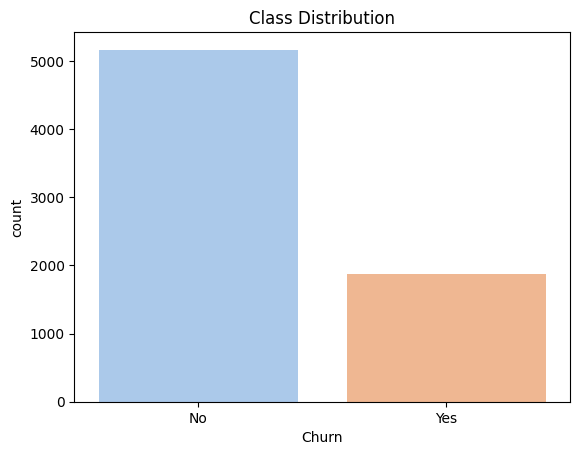

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

In [7]:
# 5.1 Class Distribution
sns.countplot(data=df, x='Churn', palette='pastel')
plt.title("Class Distribution")
plt.show()

# 5.2 Percentage
df['Churn'].value_counts(normalize=True)


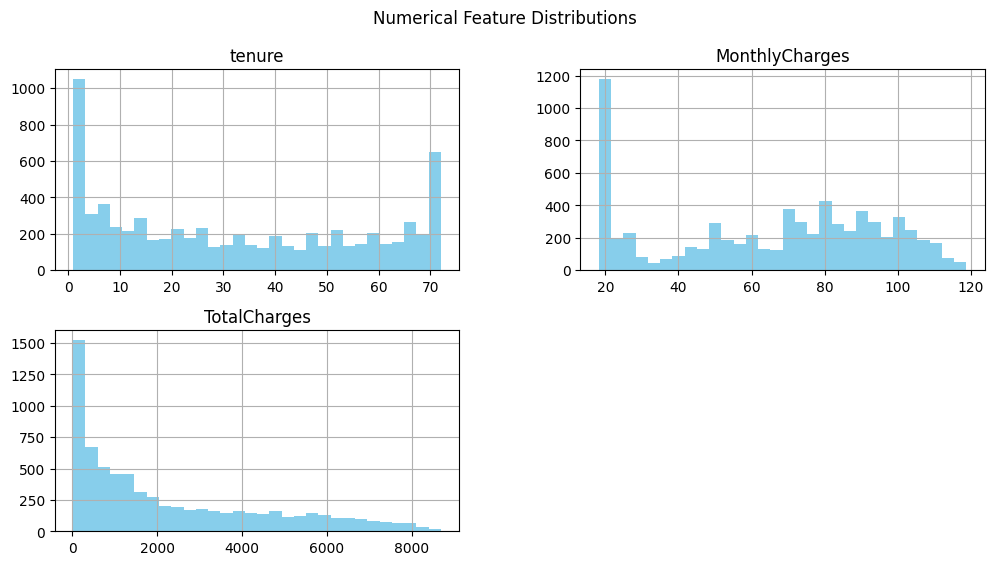

In [8]:
# 6.1 Numerical Columns
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[num_cols].hist(bins=30, figsize=(12, 6), color='skyblue')
plt.suptitle("Numerical Feature Distributions")
plt.show()


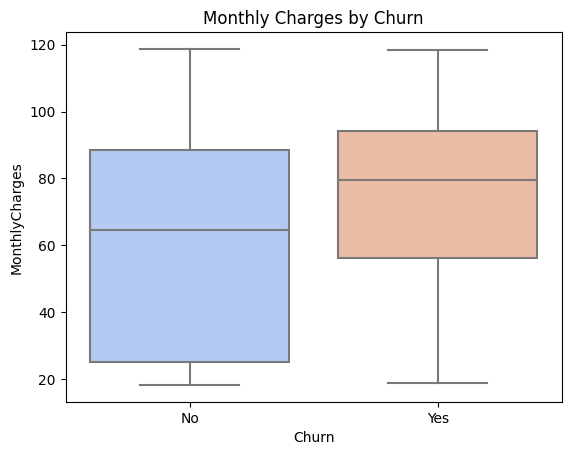

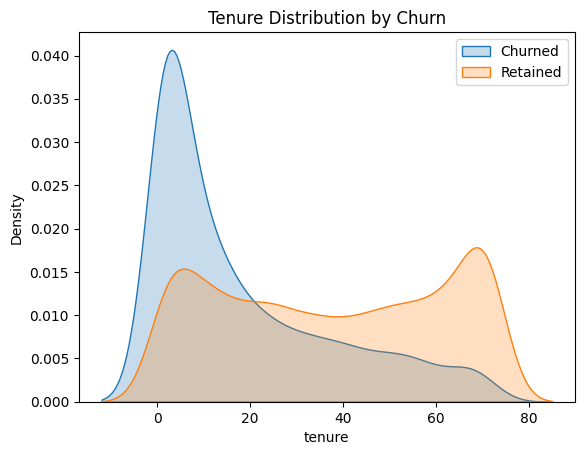

In [9]:
# 7.1 Boxplot: MonthlyCharges vs Churn
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette='coolwarm')
plt.title("Monthly Charges by Churn")
plt.show()

# 7.2 Tenure vs Churn
sns.kdeplot(data=df[df['Churn']=="Yes"], x='tenure', label="Churned", shade=True)
sns.kdeplot(data=df[df['Churn']=="No"], x='tenure', label="Retained", shade=True)
plt.title("Tenure Distribution by Churn")
plt.legend()
plt.show()


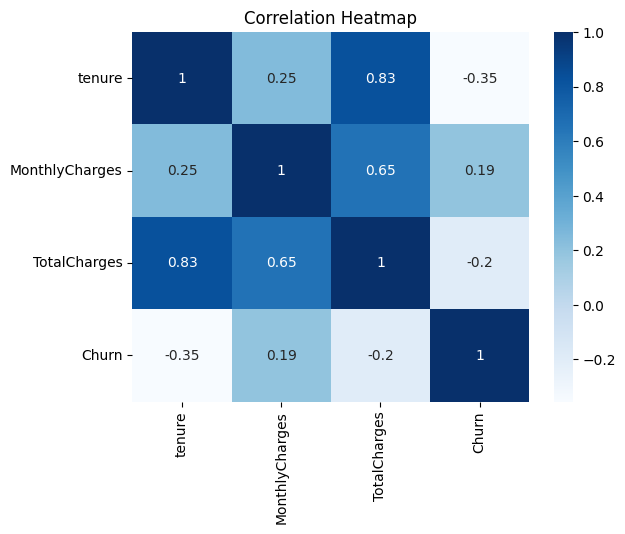

In [10]:
# 8.1 Encode categorical temporarily for correlation
temp_df = df.copy()
temp_df['Churn'] = temp_df['Churn'].map({'No': 0, 'Yes': 1})
corr = temp_df[num_cols + ['Churn']].corr()

# 8.2 Heatmap
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


In [11]:
# 9.1 Export for next phase
df.to_csv("cleaned_churn_data.csv", index=False)


In [12]:
print("✅ EDA completed successfully. Cleaned data saved as 'cleaned_churn_data.csv'")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("Churn Rate: {:.2f}%".format((df['Churn'] == 'Yes').mean() * 100))


✅ EDA completed successfully. Cleaned data saved as 'cleaned_churn_data.csv'
Rows: 7032, Columns: 20
Churn Rate: 26.58%


In [14]:
# Step 6.1: Convert target variable 'Churn' to binary 0/1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Step 6.2: Identify categorical columns (excluding target)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Step 6.3: One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Step 6.4: Check new dataframe shape
print(f"Encoded dataframe shape: {df_encoded.shape}")


Encoded dataframe shape: (7032, 31)
